Problem: Using all of the information provided, find out which feature will help predict the price of a house. 

In [136]:
#import packages
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [137]:
# read the data
df = pd.read_csv('../../data/kc_house_data.csv')

In [138]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [139]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [140]:
df = df.fillna(0)

In [141]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [143]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [144]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,0.0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1.0,0.0,...,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,...,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1.0,4.0,...,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1.0,4.0,...,12,6350,290.0,2004,0.0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0.0,0.0,...,12,6430,0.0,2001,0.0,98004,47.6208,-122.219,3720,14592


Find the features that are most correlated to the target.

In [145]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [146]:
features = ['sqft_living','grade','sqft_above']

In [147]:
for col in df.columns:
    print(col)
    print(df[col].value_counts().head())
    print('\n')

id
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64


bedrooms
3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64


sqft_living
1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot
5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64


floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64


waterfront
0.0    21451
1.0      146
Name: waterfront, dtype: int64


view
0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype

In [148]:
df.id.duplicated().sum()

177

In [149]:
df_id_dups = df[df.duplicated('id')]

In [150]:
df.drop_duplicates(subset= 'id', keep='last', inplace = True)

In [151]:
df.id.duplicated().sum()

0

In [152]:
#Removing 33 outlier from bedrooms
df = df[df['bedrooms'] != 33]


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

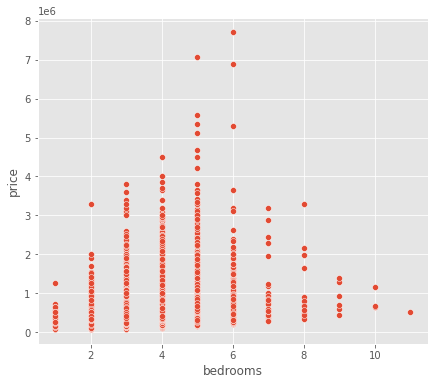

In [153]:

plt.figure(figsize=(7, 6))
sns.scatterplot(x=df['bedrooms'],y=df['price'])

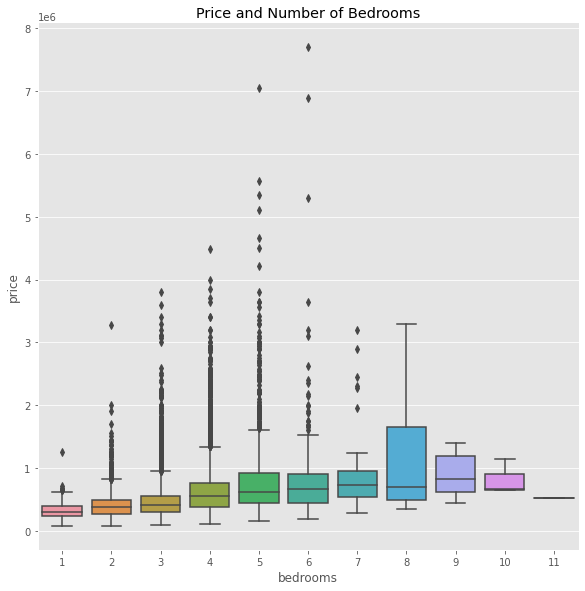

In [154]:

sns.catplot(x='bedrooms',y='price',kind='box',data=df,height=8)
plt.title('Price and Number of Bedrooms');

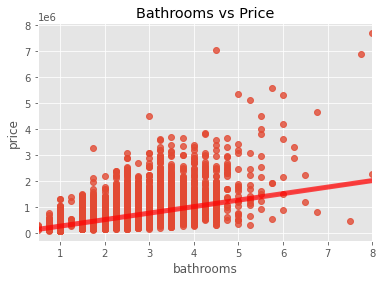

In [155]:
sns_plot = sns.regplot(x=df['bathrooms'], y=df['price'], line_kws={"color":"r","alpha":0.7,"lw":5}).set(title='Bathrooms vs Price')

In [156]:
df['bed_bath'] = df['bedrooms']/df['bathrooms'] 

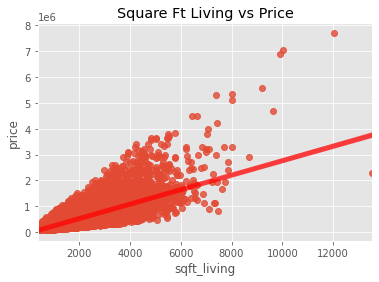

In [157]:
sns_plot = sns.regplot(x=df['sqft_living'], y=df['price'], line_kws={"color":"r","alpha":0.7,"lw":5}).set(title='Square Ft Living vs Price')



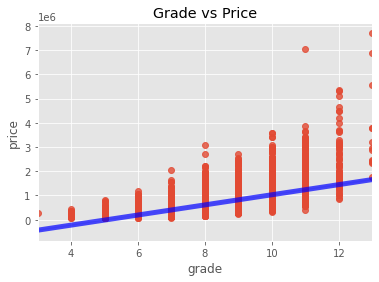

In [158]:
sns_plot = sns.regplot(x=df['grade'], y=df['price'], line_kws={"color":"b","alpha":0.7,"lw":5}).set(title='Grade vs Price')

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

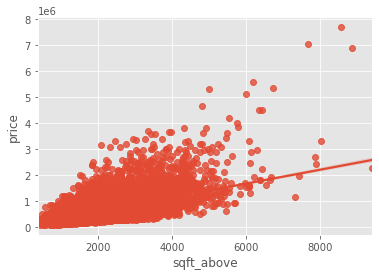

In [159]:
sns.regplot(x='sqft_above', y='price', data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

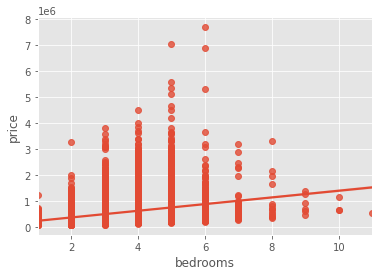

In [160]:
sns.regplot(x='bedrooms', y='price', data=df)

450000.0    172
350000.0    167
550000.0    157
500000.0    151
425000.0    149
325000.0    146
400000.0    144
Name: price, dtype: int64

<AxesSubplot:>

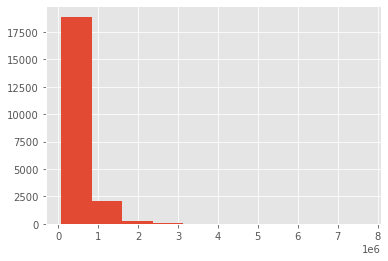

In [161]:

display(df['price'].value_counts().head(7))
df['price'].hist()

In [162]:
df['price'].value_counts().sort_values(ascending = False)

450000.0    172
350000.0    167
550000.0    157
500000.0    151
425000.0    149
           ... 
455800.0      1
406650.0      1
291970.0      1
324747.0      1
443725.0      1
Name: price, Length: 3595, dtype: int64

Model 1 with outliers

In [163]:
X = X =df.drop('price', axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8, test_size = 0.2, random_state=2021)

In [164]:
model_1_train = X_train[['sqft_living','grade','sqft_above']]

model_1_test = X_test[['sqft_living','grade','sqft_above']]


model1 = LinearRegression()


model1.fit(model_1_train, y_train)


train_preds = model1.predict(model_1_train)
test_preds = model1.predict(model_1_test)


train_error = mean_squared_error(y_train, train_preds, squared=False)
test_error = mean_squared_error(y_test, test_preds, squared=False)





print('Train error:', train_error)
print('Test error:', test_error)
print(y_train,train_preds)


Train error: 250237.51622383963
Test error: 245068.98828447206
4455      390000.0
4726      538000.0
14236     655000.0
3920     1500000.0
7712      245000.0
           ...    
16496     255000.0
20492     394950.0
2693      705000.0
17697     990000.0
6249      335950.0
Name: price, Length: 17135, dtype: float64 [313753.38095761 841898.72579213 477374.50435749 ... 729167.766015
 744511.88394783 245708.37978645]


In [165]:
def plot_errors(y_true, y_preds):
    errors = pd.DataFrame()
    errors['bins'] = pd.qcut(y_true, 10)
    errors['error'] = y_preds - y_true
    errors.groupby('bins').mean().plot(kind='bar', figsize=(15,6))
    plt.xticks(rotation=40);

In [166]:
def model(X_train, X_test, y_train, y_test):

    model1 = LinearRegression()


    model1.fit(X_train, y_train)


    train_preds = model1.predict(X_train)
    test_preds = model1.predict(X_test)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    train_error = mean_squared_error(y_train, train_preds, squared=False)
    test_error = mean_squared_error(y_test, test_preds, squared=False)

    print('Train error:', train_error)
    print('Test error:', test_error)
    plot_errors(y_test, test_preds)
    
    
def plot_errors(y_true, y_preds):
    errors = pd.DataFrame()
    errors['bins'] = pd.qcut(y_true, 10)
    errors['error'] = y_preds - y_true
    errors.groupby('bins').mean().plot(kind='bar', figsize=(15,6))
    plt.xticks(rotation=40);

Train error: 250237.51622383963
Test error: 245068.98828447206


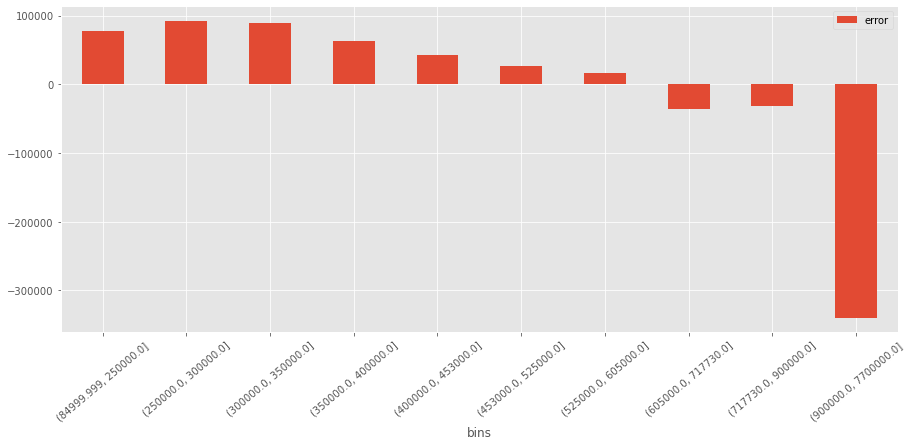

In [167]:
model_1_train = X_train[['sqft_living','grade','sqft_above']]

model_1_test = X_test[['sqft_living','grade','sqft_above']]

model(model_1_train, model_1_test, y_train, y_test)

Model2/ model 1 without outliers.

In [168]:
no_outliers = df[np.abs(stats.zscore(df['price'])) < 3]

In [169]:
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(no_outliers.drop('price', axis = 1), no_outliers.price)

Train error: 177917.43104275689
Test error: 183106.96714253825


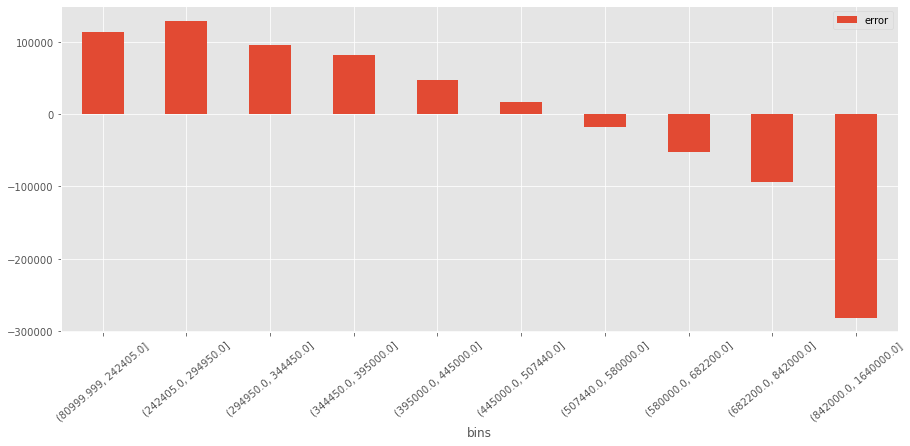

In [170]:
model_2_train = X_train_no[['sqft_living','grade','sqft_above']]
model_2_test = X_test_no[['sqft_living','grade','sqft_above']]

model(model_2_train, model_2_test, y_train_no, y_test_no)

Model 3

In [171]:
no_outliers = df[np.abs(stats.zscore(df['price'])) < 3]

In [172]:
X_train_no_o, X_test_no_o, y_train_no_o, y_test_no_o = train_test_split(no_outliers.drop('price', axis = 1), no_outliers.price)

In [173]:
model_3_train = X_train[['bedrooms','sqft_living','grade','sqft_above']]

model_3_test = X_test[['bedrooms','sqft_living','grade','sqft_above']]

Train error: 247805.35044794853
Test error: 242774.5815829079


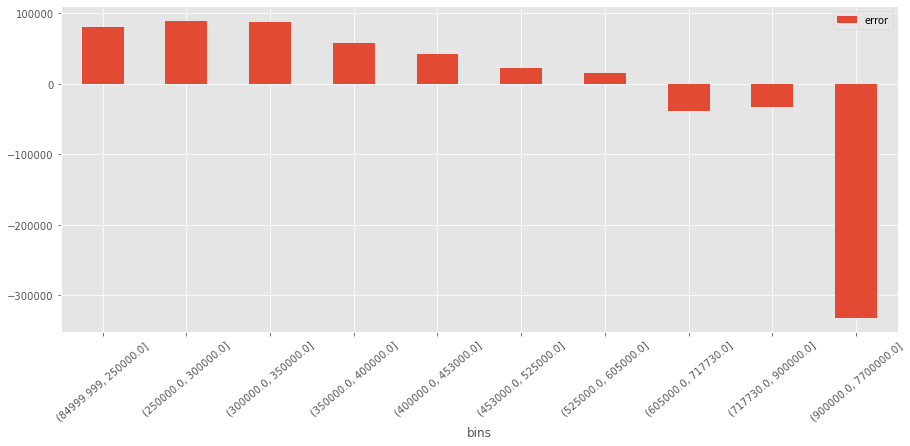

In [177]:
model(model_3_train, model_3_test, y_train, y_test)